In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df=pd.read_csv('titanic.csv')
df=df.rename(str.lower, axis=1)
df.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Number of female and male at Titanic

In [3]:
len(df[df.sex=='female'])

314

In [4]:
round(len(df[df.sex=='female'])/len(df),2)

0.35

In [5]:
len(df[df.sex=='male'])

577

In [6]:
round(len(df[df.sex=='male'])/len(df),2)

0.65

#### Average age of female and male at Titanic

In [7]:
df.groupby(by=df.sex).age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

#### The average survival ratio for all passangers 

In [8]:
# 1
len(df[df.survived==1])/len(df.survived)
# 2
df.survived.sum()/len(df.survived)

0.3838383838383838

#### The survival ratio for female/male passangers 

##### #1

In [9]:
dff=df[df.sex=='female']
dff.survived.sum()/len(dff.survived)

0.7420382165605095

In [10]:
dfm=df[df.sex=='male']
dfm.survived.sum()/len(dfm.survived)

0.18890814558058924

##### #2

In [11]:
def survival_ratio(survived):
    return survived.sum()/len(survived)

In [12]:
df.groupby('sex').survived.aggregate(survival_ratio)

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

#### The survival ratio for  passangers older then 40

In [13]:
df40=df[df.age>=40]

In [14]:
df40.survived.sum()/len(df40.survived)

0.37423312883435583

#### The survival ratio for  passangers by class

In [15]:
df1=df.groupby('pclass').survived.aggregate(survival_ratio)
df1

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

Text(0, 0.5, 'Survival ratio')

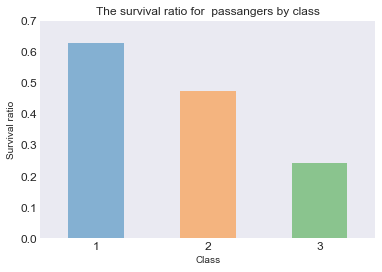

In [16]:
plt.style.use('seaborn-dark')
df1.plot.bar(figsize=(6,4),fontsize=12, 
                       title='The survival ratio for  passangers by class', 
                        width=0.5, grid=False, alpha=0.5, rot=0, ylim=(0,0.7))
plt.xlabel('Class')
plt.ylabel('Survival ratio')

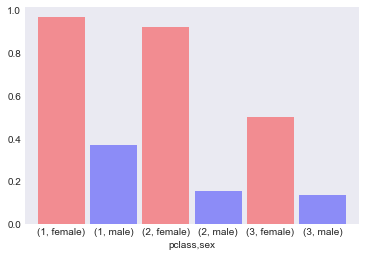

In [17]:
df.groupby(by=[df.pclass,df.sex]).survived.aggregate(survival_ratio).plot.bar(alpha=0.4, width=0.9,
            color=['red','blue','red','blue','red','blue'],rot=0,figsize=(6,4))